# Лабораторная работа №1
## Вариант 15
### Мотякин Артем Андреевич СКБ211

__15: Массив данных ЗАГСа:__ ФИО жениха, дата рождения жениха,  ФИО невесты, дата рождения невесты, дата бракосочетания,  номер ЗАГСа (сравнение по полям – номер ЗАГСа, дата  бракосочетания, ФИО жениха)<br>

__а) Сортировка выбором<br>
г) Шейкер-сортировка<br>
е) Быстрая сортировка__

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from datetime import datetime, timedelta
import time
from math import log, sqrt

In [19]:
arr_sizes = np.array([100, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000])
table = pd.read_csv('Names.csv', sep=';', index_col=False, header=None)#csv где по 100 женских и мужских ФИО
arr_names_man = np.array(table[0])
arr_names_woman = np.array(table[1])

In [24]:
#Сгенерируем 9 наборов данных следующих размерностей: 100, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000
print("Generating data...\n")
for i in np.nditer(arr_sizes):
    name_groom = np.random.choice(arr_names_man, size=i)
    name_bride = np.random.choice(arr_names_woman, size=i)
    num_registry = np.random.randint(1, high=i+1, size=i)
    date_groom = []
    date_bride = [] 
    date_wedding = []
    
    for _ in range(i):
        start_date_birthday = datetime.strptime("01-01-1980", "%d-%m-%Y")
        end_date_birthday = datetime.strptime("01-01-2000", "%d-%m-%Y")

        start_date_wedding = datetime.strptime("01-01-2018", "%d-%m-%Y")
        end_date_wedding = datetime.strptime("01-01-2024", "%d-%m-%Y")

        days_birthday = (end_date_birthday - start_date_birthday).days
        days_wedding = (end_date_wedding - start_date_wedding).days

        date_groom.append((start_date_birthday + timedelta(days=np.random.randint(0, high=days_birthday))).strftime("%d-%m-%Y"))
        date_bride.append((start_date_birthday + timedelta(days=np.random.randint(0, high=days_birthday))).strftime("%d-%m-%Y"))
        date_wedding.append((start_date_wedding + timedelta(days=np.random.randint(0, high=days_wedding))).strftime("%d-%m-%Y"))
        
    print('Generating ', len(date_wedding), "done!")
    
    d = {"Groom fullname": name_groom,
           "Groom birth date": np.array(date_groom),
           "Bride fullname": name_bride,
           "Bride birth date": np.array(date_bride),
           "Wedding date": np.array(date_wedding),
           "Registry office number": num_registry}
    df = pd.DataFrame(data=d)
    df.to_csv(f"Data_{i}.csv")
    print('Saved ', len(date_wedding), "to csv!")


Generating data...

Generating  100 done!
Saved  100 to csv!
Generating  500 done!
Saved  500 to csv!
Generating  1000 done!
Saved  1000 to csv!
Generating  2000 done!
Saved  2000 to csv!
Generating  5000 done!
Saved  5000 to csv!
Generating  10000 done!
Saved  10000 to csv!
Generating  20000 done!
Saved  20000 to csv!
Generating  50000 done!
Saved  50000 to csv!
Generating  100000 done!
Saved  100000 to csv!


In [53]:
class Obj:
    def __init__(self, arr):
        self.num_reg = int(arr[6])
        self.gr_fname = arr[1]
        self.date_w = datetime.strptime(arr[5], "%d-%m-%Y")
        self.date_gr = datetime.strptime(arr[2], "%d-%m-%Y")
        self.br_fname = arr[3]
        self.date_br = datetime.strptime(arr[4], "%d-%m-%Y")
        
    def __le__(self, other): # <=
        return (self.num_reg, self.gr_fname, self.date_w) <= (other.num_reg, other.gr_fname, other.date_w)
        
    def __ge__(self, other): # >=
        return (self.num_reg, self.gr_fname, self.date_w) >= (other.num_reg, other.gr_fname, other.date_w)
        
    def __lt__(self, other): # <
        return (self.num_reg, self.gr_fname, self.date_w) < (other.num_reg, other.gr_fname, other.date_w)
    
    def __gt__(self, other): # >
        return (self.num_reg, self.gr_fname, self.date_w) > (other.num_reg, other.gr_fname, other.date_w)
    
    def __eq__(self, other): # ==
        return (self.num_reg, self.gr_fname, self.date_w) == (other.num_reg, other.gr_fname, other.date_w)
    
    def pr(self): # вывод в консоль
        print(f"{self.gr_fname}, {self.date_gr}, {self.br_fname}, {self.date_br}, {self.date_w}, {self.num_reg}")
    
    
def SelectSort(arr):
    l = len(arr)
    for i in range(l): # i - current step
        k = i
        x = arr[i]
        for j in range(i+1, l): # loop for searching minimal element
            if Obj(arr[j]) < Obj(x):
                k = j
                x = arr[j]
        # swap minimal element and a[i]
        arr[k], arr[i] = arr[i], x


def ShakerSort(arr):
    k = len(arr) - 1
    ub = len(arr) - 1
    lb = 1
    while True:
        # from bottom to top passage 
        for j in reversed(range(1, ub+1)):
            if Obj(arr[j-1]) > Obj(arr[j]):
                arr[j-1], arr[j] = arr[j], arr[j-1]
                k = j
        lb = k+1
        
        # passage from top to bottom
        for j in range(lb, ub+1):
            if Obj(arr[j-1]) > Obj(arr[j]):
                arr[j-1], arr[j] = arr[j], arr[j-1]
                k = j
        ub = k-1
        if lb >= ub:
            break

            
def partition(arr, left, right):
    pivot = Obj(arr[right])
    sorted_idx = left - 1
    for j in range(left, right):
        if Obj(arr[j]) < pivot:
            sorted_idx += 1
            arr[sorted_idx], arr[j] = arr[j], arr[sorted_idx]
    arr[sorted_idx+1], arr[right] = arr[right], arr[sorted_idx+1]
    return sorted_idx + 1

def QuickSort(arr, left, right):
    if left < right:
        pivot = partition(arr, left, right)
        QuickSort(arr, left, pivot-1)
        QuickSort(arr, pivot+1, right)

In [ ]:
print("Getting data...\n")
arr_select = []
arr_shaker = []
arr_quick = []
for i in np.nditer(arr_sizes):
    print(f"Computing {i}")
    df = pd.read_csv(f'Data_{i}.csv', index_col=False, header=None)
    arr1 = df.to_numpy().tolist()[1:]
    arr2 = df.to_numpy().tolist()[1:]
    arr3 = df.to_numpy().tolist()[1:]
    
    print(f"SelectSort {i}")
    start_time = time.time_ns() / 1000000 # time in milliseconds
    SelectSort(arr1)
    arr_select.append(time.time_ns() / 1000000 - start_time)
    df1 = pd.DataFrame(data=arr1)
    df1.to_csv(f"Data_SelectSort_{i}.csv")
    
    print(f"ShakerSort {i}")
    start_time = time.time_ns() / 1000000 # time in milliseconds
    ShakerSort(arr2)
    arr_shaker.append(time.time_ns() / 1000000 - start_time)
    df2 = pd.DataFrame(data=arr2)
    df2.to_csv(f"Data_ShakerSort_{i}.csv")
    
    print(f"QuickSort {i}")
    start_time = time.time_ns() / 1000000 # time in milliseconds
    QuickSort(arr3, 0, len(arr3)-1)
    arr_quick.append(time.time_ns() / 1000000 - start_time)
    df3 = pd.DataFrame(data=arr3)
    df3.to_csv(f"Data_QuickSort_{i}.csv")
    
    assert arr1==arr2
    assert arr1==arr3
    
print("Done!")

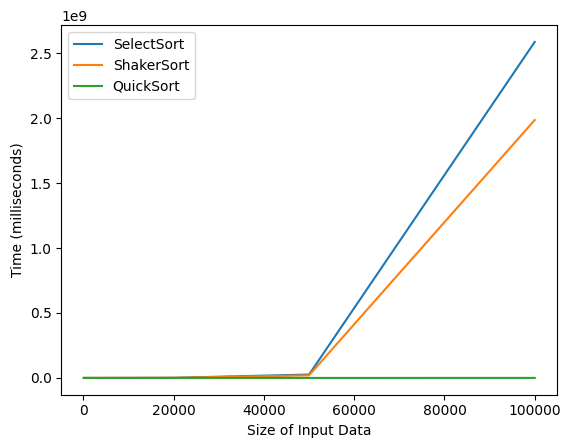

In [12]:
plt.plot(arr_sizes, arr_select, label='SelectSort')
plt.plot(arr_sizes, arr_shaker, label='ShakerSort')
plt.plot(arr_sizes, arr_quick, label='QuickSort')
plt.xlabel('Size of Input Data')
plt.ylabel('Time (milliseconds)')
plt.legend()
plt.show()

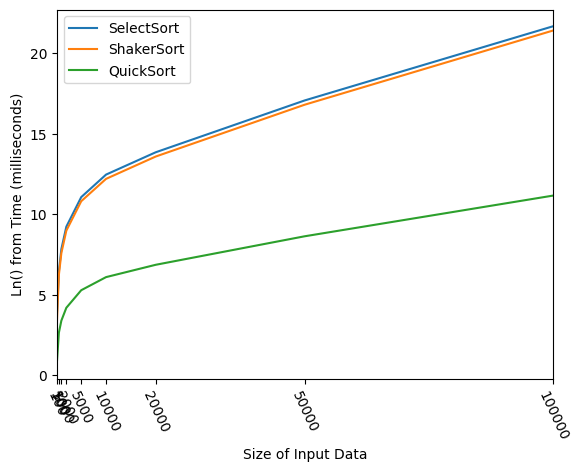

In [13]:
plt.plot(arr_sizes, [log(i) for i in arr_select], label='SelectSort')
plt.plot(arr_sizes, [log(i) for i in arr_shaker], label='ShakerSort')
plt.plot(arr_sizes, [log(i) for i in arr_quick], label='QuickSort')
plt.xlabel('Size of Input Data')
plt.ylabel('Ln() from Time (milliseconds)')
plt.xticks(arr_sizes, rotation=-65)
plt.xlim(arr_sizes[0], arr_sizes[-1])
plt.legend()
plt.show()

# Лабораторная работа №2
## Вариант 15
### Мотякин Артем Андреевич СКБ211

1) Реализовать поиск заданного элемента в массиве  объектов по ключу в соответствии с вариантом (ключом является  первое НЕ числовое поле объекта) следующими методами:<br>
с помощью __бинарного дерева поиска__<br>
с помощью __красно-черного дерева__<br>
с помощью __хэш таблицы__
2) Для хэш таблицы необходимо реализовать хэш функцию и метод разрешения коллизий. Подсчитать число коллизий хэш функции и построить график зависимости от размерности массива.
3) Выполнить поиск 7-10 раз на массивах разных размерностей от 100 и более (но не менее, чем до 100000). Засечь (программно) время поиска для  всех способов. По полученным точкам  построить сравнительные графики зависимости времени поиска от размерности  массива. 
4) Записать входные данные в ассоциативный массив multimap<key,  object> и сравнить время поиска по ключу в нем с временем поиска из п.3. Добавить данные по времени поиска в ассоциативном массиве в общее сравнение с остальными способами и построить график зависимости времени поиска от размерности массива.

In [62]:
class BTreeNode: # бинарное дерево
    def __init__(self, value=None, content=None): # конструктор
        self.left = None
        self.right = None
        self.value = value
        self.content = content

    def insert(self, value, content=None): # вставка нового элемента
        if self.value is None:
            self.value = value
            self.content = content
        elif value < self.value:
            if self.left is None:
                self.left = BTreeNode(value, content)
            else:
                self.left.insert(value, content)
        else:
            if self.right is None:
                self.right = BTreeNode(value, content)
            else:
                self.right.insert(value, content)

    def traversal(self): # проходка и вывод дерева 
        if self.left:
            self.left.traversal()
        print(self.value, self.content)
        if self.right:
            self.right.traversal()

    def find(self, value): # поиск элемента по ключу
        if value < self.value:
            if self.left is None:
                raise Exception('error, node content is None')
            else:
                return self.left.find(value)
        elif value > self.value:
            if self.right is None:
                raise Exception('error, node content is None')
            else:
                return self.right.find(value)
        else:
            return self.content


class RBTreeNode: # чёрно-красное дерево (узел дерева)
    def __init__(self, val, content=None): # конструктор
        self.red = False
        self.parent = None
        self.val = val
        self.left = None
        self.right = None
        self.content = content


class RBTree: # чёрно-красное дерево (само дерево)
    def __init__(self): # конструктор
        self.nil = RBNode(0)
        self.nil.red = False
        self.nil.left = None
        self.nil.right = None
        self.root = self.nil

    def insert(self, val, content=None): # вставка нового элемента
        new_node = RBTreeNode(val, content)
        new_node.parent = None
        new_node.left = self.nil
        new_node.right = self.nil
        new_node.red = True
        parent = None
        current = self.root
        while current != self.nil:
            parent = current
            if new_node.val < current.val:
                current = current.left
            elif new_node.val > current.val:
                current = current.right
            else:
                return
        new_node.parent = parent
        if parent is None:
            self.root = new_node
        elif new_node.val < parent.val:
            parent.left = new_node
        else:
            parent.right = new_node
        self.fix_insert(new_node)

    def fix_insert(self, new_node): # метод, который делает дерево черно-красным (приводит его к правильному виду)
        while new_node != self.root and new_node.parent.red:
            if new_node.parent == new_node.parent.parent.right:
                u = new_node.parent.parent.left
                if u.red:
                    u.red = False
                    new_node.parent.red = False
                    new_node.parent.parent.red = True
                    new_node = new_node.parent.parent
                else:
                    if new_node == new_node.parent.left:
                        new_node = new_node.parent
                        self.rotate_right(new_node)
                    new_node.parent.red = False
                    new_node.parent.parent.red = True
                    self.rotate_left(new_node.parent.parent)
            else:
                u = new_node.parent.parent.right
                if u.red:
                    u.red = False
                    new_node.parent.red = False
                    new_node.parent.parent.red = True
                    new_node = new_node.parent.parent
                else:
                    if new_node == new_node.parent.right:
                        new_node = new_node.parent
                        self.rotate_left(new_node)
                    new_node.parent.red = False
                    new_node.parent.parent.red = True
                    self.rotate_right(new_node.parent.parent)
        self.root.red = False

    def exists(self, val): # поиск элемента
        curr = self.root
        while curr != self.nil and val != curr.val:
            if val < curr.val:
                curr = curr.left
            else:
                curr = curr.right
        if curr.content is None:
            raise Exception('error, node content is None')
        else:
            return curr.content

    def rotate_left(self, x): # вращение влево
        y = x.right
        x.right = y.left
        if y.left != self.nil:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def rotate_right(self, x): # вращение вправо
        y = x.left
        x.left = y.right
        if y.right != self.nil:
            y.right.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    def __repr__(self): # перегрузка оператора вывода
        lines = []
        print_tree(self.root, lines)
        return '\n'.join(lines)


def print_tree(node, lines, level=0): # вывод дерева
    if node.val != 0:
        print_tree(node.left, lines, level + 1)
        print(node.val, node.content)
        print_tree(node.right, lines, level + 1)


class HashTable: #хэш таблица
    __collisions = 0 # количество коллизий

    def __init__(self, n=100): # конструктор
        self.MAX = n
        self.arr = [[] for i in range(self.MAX)]

    def __get_hash(self, key): # получить хэш
        h = 0
        for char in key:
            h += ord(char)
        return h % self.MAX

    def __setitem__(self, key, value): # добавить значение
        hsh = self.__get_hash(key)
        found = False
        for idx, element in enumerate(self.arr[hsh]):
            if len(element) == 2 and element[0] == key:
                if element[1] == value:
                    self.arr[hsh][idx] = (key, value)
                    found = True
                    break
        if not found and len(self.arr[hsh]) > 0:
            self.arr[hsh].append((key, value))
            self.__collisions += 1
        elif not found:
            self.arr[hsh].append((key, value))

    def __getitem__(self, key): # получить значение
        hsh = self.__get_hash(key)
        for element in self.arr[hsh]:
            if element[0] == key:
                return element[1]
        raise Exception(f"No {key} key in HashTable")

    def __delitem__(self, key): # удалить значение
        hsh = self.__get_hash(key)
        for idx, element in enumerate(self.arr[hsh]):
            if element[0] == key:
                del self.arr[hsh][idx]

    def get_collisions_number(self): # получить количество коллизий
        print('Количество коллизий: ', self.__collisions)
        return self.__collisions

    def pr(self): # вывод хэш таблицы
        for i in self.arr:
            print(i)

In [63]:
print("Getting data...\n")
arr_btree = []
arr_rbtree = []
arr_htable = []
arr_multimap = []
for i in np.nditer(arr_sizes):
    print(f"Setting data {i}")
    df = pd.read_csv(f'Data_{i}.csv', index_col=False, header=None)
    arr = df.to_numpy().tolist()[1:]
    arr_btree.append(TreeNode())
    arr_rbtree.append(RBTree())
    arr_htable.append(HashTable(100))#len(df.index)
    arr_multimap.append(dict())
    for row in arr:
        obj = Obj(row) # создаём наш объект (из Лабораторной 1)
        arr_btree[-1].insert(value=row[1], content=obj)
        arr_rbtree[-1].insert(val=row[1], content=obj)
        arr_htable[-1][row[1]] = obj
        arr_multimap[-1][row[1]] = obj
print("\nCreating data structures done!\n")

Getting data...

Setting data 100
Setting data 500
Setting data 1000
Setting data 2000
Setting data 5000
Setting data 10000
Setting data 20000
Setting data 50000
Setting data 100000

Creating data structures done!



In [64]:
print("Start computing...\n")
arr_btree_time = []
arr_rbtree_time = []
arr_htable_time = []
arr_htable_collisions = []
arr_multimap_time = []
arr_names = ["Новиков Виктор Маркович", "Смирнов Лев Михайлович", "Данилов Владимир Егорович", "Горбачев Александр Тихонович", "Жуков Андрей Петрович", "Филатов Лука Андреевич", "Фетисов Кирилл Артемьевич"]

for i in range(len(arr_sizes)):
    times = 0
    for name in arr_names:
        start_time = time.time_ns() / 1000 # time in microseconds
        arr_btree[i].find(name).pr()
        times += time.time_ns() / 1000 - start_time 
    arr_btree_time.append(times / len(arr_names))
    print(f'Бинарное дерево (size {arr_sizes[i]}): ', arr_btree_time[-1])

    times = 0
    for name in arr_names:
        start_time = time.time_ns() / 1000 # time in microseconds
        arr_rbtree[i].exists(name).pr()
        times += time.time_ns() / 1000 - start_time 
    arr_rbtree_time.append(times / len(arr_names))
    print(f'Черно-красное дерево (size {arr_sizes[i]}): ', arr_rbtree_time[-1])

    times = 0
    for name in arr_names:
        start_time = time.time_ns() / 1000 # time in microseconds
        arr_htable[i][name].pr()
        times += time.time_ns() / 1000 - start_time 
    arr_htable_time.append(times / len(arr_names))
    print(f'Хеш-таблица (size {arr_sizes[i]})', arr_htable_time[-1])

    times = 0
    for name in arr_names:
        start_time = time.time_ns() / 1000 # time in microseconds
        arr_multimap[i][name].pr()
        times += time.time_ns() / 1000 - start_time 
    arr_multimap_time.append(times / len(arr_names))
    print(f'MultiMap (size {arr_sizes[i]}): ', arr_multimap_time[-1])

    arr_htable_collisions.append(arr_htable[i].get_collisions_number())
    print("\n\n\n")

print("\nComputing done!")

Start computing...

Новиков Виктор Маркович, 1995-09-06 00:00:00, Ильина Вероника Олеговна, 1988-07-22 00:00:00, 2022-02-26 00:00:00, 48
Смирнов Лев Михайлович, 1983-09-10 00:00:00, Михеева Аделина Елисеевна, 1986-11-18 00:00:00, 2018-01-12 00:00:00, 60
Данилов Владимир Егорович, 1998-02-05 00:00:00, Кудряшова Полина Алиевна, 1980-04-20 00:00:00, 2018-02-10 00:00:00, 66
Горбачев Александр Тихонович, 1982-11-22 00:00:00, Ершова София Максимовна, 1981-07-30 00:00:00, 2022-05-13 00:00:00, 48
Жуков Андрей Петрович, 1997-02-10 00:00:00, Павлова Александра Ярославовна, 1994-12-18 00:00:00, 2023-10-03 00:00:00, 65
Филатов Лука Андреевич, 1989-04-01 00:00:00, Петровская Амира Тимофеевна, 1991-01-22 00:00:00, 2021-03-17 00:00:00, 90
Фетисов Кирилл Артемьевич, 1985-12-17 00:00:00, Михайлова София Алексеевна, 1986-08-03 00:00:00, 2018-08-14 00:00:00, 59
Бинарное дерево (size 100):  30.285714285714285
Новиков Виктор Маркович, 1995-09-06 00:00:00, Ильина Вероника Олеговна, 1988-07-22 00:00:00, 2022

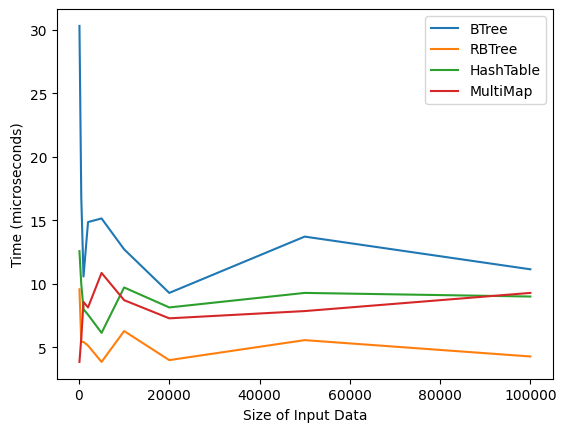

In [65]:
plt.plot(arr_sizes, arr_btree_time, label='BTree')
plt.plot(arr_sizes, arr_rbtree_time, label='RBTree')
plt.plot(arr_sizes, arr_htable_time, label='HashTable')
plt.plot(arr_sizes, arr_multimap_time, label='MultiMap')
plt.xlabel('Size of Input Data')
plt.ylabel('Time (microseconds)')
plt.legend()
plt.show()

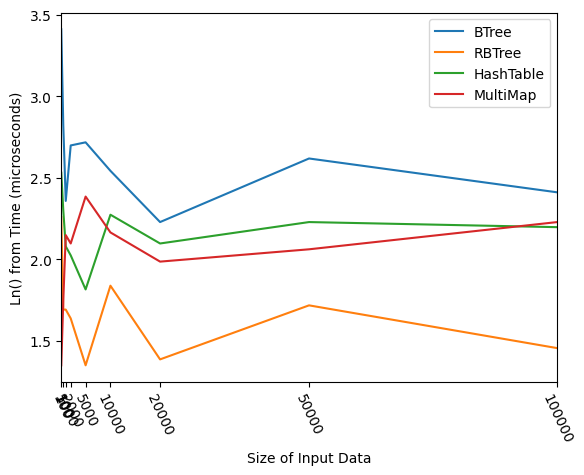

In [67]:
plt.plot(arr_sizes, [log(i) for i in arr_btree_time], label='BTree')
plt.plot(arr_sizes, [log(i) for i in arr_rbtree_time], label='RBTree')
plt.plot(arr_sizes, [log(i) for i in arr_htable_time], label='HashTable')
plt.plot(arr_sizes, [log(i) for i in arr_multimap_time], label='MultiMap')
plt.xlabel('Size of Input Data')
plt.ylabel('Ln() from Time (microseconds)')
plt.xticks(arr_sizes, rotation=-65)
plt.xlim(arr_sizes[0], arr_sizes[-1])
plt.legend()
plt.show()

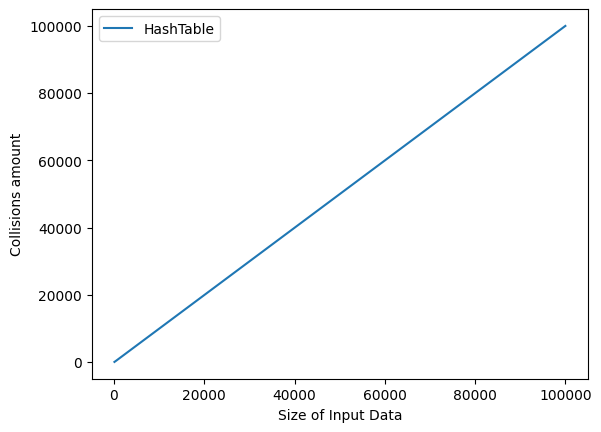

In [66]:
plt.plot(arr_sizes, arr_htable_collisions, label='HashTable')
plt.xlabel('Size of Input Data')
plt.ylabel('Collisions amount')
plt.legend()
plt.show()

# Лабораторная работа №3

### Мотякин Артем Андреевич СКБ211

1. Модифицировать (предложить собственные) два метода генерации псевдослучайных чисел.
2. Получить не менее 20 выборок каждым методом (диапазон чисел в каждой выборке не менее 5000) объемом не менее 100 элементов каждая.
3. Для каждой выборки посчитать среднее, отклонение и коэффициент вариации.
4. Каждую выборку проверить на равномерность распределения и случайность, используя критерий Хи-квадрат.
5. Для каждого алгоритма осуществить проверку с помощью не менее 3-х тестов NIST и/или Diehard. Сделать выводы и сравнить их с п.4.
6. Засечь время генерации чисел от тысячи до миллиона элементов обоими предложенными методами и любым стандартным методом используемого языка программирования. Построить графики сравнения скоростей в зависимости от объема выборки.

__Конгруэнтный метод пятой степени__: $r_{i+1}=(k_1 * r^5_i + k_2 * r^4_i + k_3 * r^3_i + k_4 * r^2_i + k_5 * r_i + b) \% M$<br>
Основан на *квадратичном конгруэнтном методе*.

In [2]:
# параметры программы:
N = 20 #кол-во наборов
n = 160 #кол-во элементов в наборе
path = "./gen_1_results/"

# параметры генератора:
M = 2**31-1
k1 = 23
k2 = 15
k3 = 3
k4 = 78
k5 = 9
r0 = 43
b = 12

In [3]:
def GenerateAnotherElement(ri):
    return (k1 * ri**5 + k2 * ri**4 + k3 * ri**3 + k4 * ri**2 + k5 * ri**2 + b) % M

In [4]:
def GenerateSampling(n, r):
    res = []
    a = r
    for i in range(n):
        a = GenerateAnotherElement(a)
        res.append(a)
    return (res, a)

In [5]:
def GenerateAllSamplings(N, n):
    res = []
    r = r0
    for i in range(N):
        (temp, r) = GenerateSampling(n, r)
        res.append(temp)
        temp_1 = ""
        for j in temp:
            a = round(j / M)
            temp_1 += str(a)
            with open( f"{path}{i}.txt", "w" ) as f:
                f.write(temp_1)
    return res

In [6]:
def СountMean(sampling):
    return sum(sampling)/len(sampling)

def CountDeviation(sampling, mean_): # sqrt( sum( (x_i - mean)^2 ) / ( n-1 ) )
    s = 0
    for i in sampling:
        s += (i - mean_)**2
    s /= (len(sampling)-1)
    return s ** (0.5)

def CountVariationCoefficient(deviation, mean_): # deviation / mean * 100
    return (deviation / mean_) * 100

Метод хи-квадрат используется для проверки гипотезы о том, что наблюдаемые данные имеют определенное распределение. Формула для вычисления статистики хи-квадрат выглядит следующим образом:<br>
$\chi^2 = \sum_{1}^{k} \frac{(O_i-E_i)^2}{E_i}$

In [7]:
def xi_squere(Sampling, k, n): # хи-квадрат. к - количество отрезков для разбиения, уровень значимости возьмем за 0.95
    delta = (M+1)/k #ширина каждого отрезка
    sampling = sorted(Sampling) #сортируем в порядке возрастания
    tmp = delta #верхняя граница текущего отрезка
    res = 0
    count = 0
    for i in sampling:
        if i < tmp:
            count += 1
        else:
            res += (((count/(n)) - (1/k))**2)/(1/k) #квадрат отклонения доли элементов в отрезке от ожидаемой доли, деленное на ожидаемую долю
            count = 1
            tmp += delta
    res *= n
    return res


In [8]:
all_samplings = GenerateAllSamplings(N, n)
for sampling in all_samplings:
    mean_ = СountMean(sampling)
    deviation = CountDeviation(sampling, mean_)
    variation_coefficient = CountVariationCoefficient(deviation, mean_)
    print("Среднее: ", mean_)
    print("Отклонение: ", deviation)
    print("Коэффициент вариации: ", variation_coefficient)
    xi_squere_ = xi_squere(sampling, 4, n)
    kvantil = 5.9915 #alpha 0.95
    if xi_squere_ < kvantil:
        print("Принимаем, хи квадрат = ", xi_squere_)
    else:
        print("Не принимаем, хи квадрат = ", xi_squere_)

Среднее:  1034939821.04375
Отклонение:  611495277.015471
Коэффициент вариации:  59.08510471640469
Принимаем, хи квадрат =  4.9250000000000025
Среднее:  1067428587.15625
Отклонение:  614253552.4980297
Коэффициент вариации:  57.5451660081983
Принимаем, хи квадрат =  0.4749999999999996
Среднее:  1063440810.88125
Отклонение:  650647460.6148914
Коэффициент вариации:  61.18323219848166
Принимаем, хи квадрат =  0.49999999999999994
Среднее:  1066050608.06875
Отклонение:  602368470.6309404
Коэффициент вариации:  56.50467867770246
Принимаем, хи квадрат =  0.5250000000000008
Среднее:  1090684160.1
Отклонение:  644103772.0168589
Коэффициент вариации:  59.05502212095974
Принимаем, хи квадрат =  1.9999999999999998
Среднее:  1134585810.79375
Отклонение:  600310792.6844865
Коэффициент вариации:  52.91012693561824
Принимаем, хи квадрат =  0.9500000000000003
Среднее:  1114948976.0
Отклонение:  586707494.5449299
Коэффициент вариации:  52.621914291522685
Принимаем, хи квадрат =  3.6500000000000012
Среднее

In [16]:
!pip install nistrng

In [31]:
import nistrng

all_samplings = GenerateAllSamplings(N, n)
for sampling in all_samplings:

    # Преобразование чисел в биты
    data_bits = np.unpackbits(np.array(sampling).astype(np.uint32).view(np.uint8))

    # Создание экземпляров тестов
    tests = [
        nistrng.SP800_22R1A_BATTERY["monobit"],
        nistrng.SP800_22R1A_BATTERY["frequency_within_block"],
        nistrng.SP800_22R1A_BATTERY["runs"],
        nistrng.SP800_22R1A_BATTERY["longest_run_ones_in_a_block"],
        nistrng.SP800_22R1A_BATTERY["binary_matrix_rank"]
    ]

    eligible_battery: dict = nistrng.check_eligibility_all_battery(data_bits, nistrng.SP800_22R1A_BATTERY)
        
    # Print the eligible tests
    print("Eligible test from NIST-SP800-22r1a:")
    for name in eligible_battery.keys():
        print("-" + name)
        
    # Test the sequence on the eligible tests
    results = nistrng.run_all_battery(data_bits, eligible_battery, False)
    
    # Print results one by one
    print("Test results:")
    for result, elapsed_time in results:
        if result.passed:
            print("- PASSED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")
        else:
            print("- FAILED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")


Eligible test from NIST-SP800-22r1a:
-monobit
-frequency_within_block
-runs
-longest_run_ones_in_a_block
-dft
-non_overlapping_template_matching
-serial
-approximate_entropy
-cumulative sums
-random_excursion
-random_excursion_variant
Test results:
- PASSED - score: 0.111 - Monobit - elapsed time: 0 ms
- PASSED - score: 0.18 - Frequency Within Block - elapsed time: 1 ms
- PASSED - score: 0.346 - Runs - elapsed time: 1 ms
- PASSED - score: 0.512 - Longest Run Ones In A Block - elapsed time: 0 ms
- FAILED - score: 0.0 - Discrete Fourier Transform - elapsed time: 0 ms
- PASSED - score: 1.0 - Non Overlapping Template Matching - elapsed time: 4 ms
- PASSED - score: 0.434 - Serial - elapsed time: 78 ms
- PASSED - score: 0.159 - Approximate Entropy - elapsed time: 70 ms
- PASSED - score: 1.0 - Cumulative Sums - elapsed time: 2 ms
- PASSED - score: 0.957 - Random Excursion - elapsed time: 6 ms
- PASSED - score: nan - Random Excursion Variant - elapsed time: 0 ms
Eligible test from NIST-SP800-2

__Proposed by George Marsaglia, professor at the University of Florida. Period 2^250, rule is:<br>
S = 2111111111*x[n-4] + 1492*x[n-3] + 1776*x[n-2] + 5115*x[n-1] + C<br>
x[n] = S / 2**32__<br>

Мой алгоритм (по аналогии):<br>
x[n] = (94604*x[n-5] + 55073*x[n-4] + 3916*x[n-3] + 83045*x[n-2] + 1774*x[n-1] + 76787) % M

In [33]:
# стартовые параметры программы
X = [86147, 67333, 50210, 43123, 35498] 
path = "./gen_2_results/"

In [34]:
def GenerateAnotherElement2(x):
    n = len(x)
    S = 94604*x[n-5] + 55073*x[n-4] + 3916*x[n-3] + 83045*x[n-2] + 1774*x[n-1] + 76787
    x.append(S % M)

In [35]:
def GenerateSampling2(n, x):
    res = x[::]
    for i in range(n):
        GenerateAnotherElement2(res)
    return res

In [36]:
def GenerateAllSamplings2(N, n):
    res = []
    x = X[::] #для копирования значений массива
    for i in range(N):
        temp = GenerateSampling2(n, x)
        res.append(temp)
        temp1 = ""
        for j in temp:
            a = round(j / M)
            temp1 += str(a)
        with open( f"{path}{i}.txt", "w" ) as f:
            f.write(temp1)
        x = temp[-5:] #5 элементов для генерации 6
    return res

In [37]:
all_samplings = GenerateAllSamplings2(N, n)
for sampling in all_samplings:
    mean_ = СountMean(sampling)
    deviation = CountDeviation(sampling, mean_)
    variation_coefficient = CountVariationCoefficient(deviation, mean_)
    print("Среднее: ", mean_)
    print("Отклонение: ", deviation)
    print("Коэффициент вариации: ", variation_coefficient)
    xi_squere_ = xi_squere(sampling, 10, n)
    kvantil = 5.9915 #alpha 0.95
    if xi_squere_ < kvantil:
        print("Принимаем, хи квадрат = ", xi_squere_)
    else:
        print("Не принимаем, хи квадрат = ", xi_squere_)
    

Среднее:  1098031665.6727273
Отклонение:  660809998.8975189
Коэффициент вариации:  60.181324414962354
Не принимаем, хи квадрат =  6.999999999999998
Среднее:  1142482560.1818182
Отклонение:  646802892.5790706
Коэффициент вариации:  56.61380883364524
Не принимаем, хи квадрат =  6.1874999999999964
Среднее:  1048221425.3575758
Отклонение:  617160340.3171378
Коэффициент вариации:  58.8769057173782
Не принимаем, хи квадрат =  6.062499999999998
Среднее:  1113948209.9878788
Отклонение:  636745052.4815773
Коэффициент вариации:  57.16110019948826
Принимаем, хи квадрат =  3.374999999999999
Среднее:  1031841675.1515151
Отклонение:  608483442.9152689
Коэффициент вариации:  58.970620936193484
Не принимаем, хи квадрат =  6.499999999999999
Среднее:  1048091623.939394
Отклонение:  643580347.1654505
Коэффициент вариации:  61.40496999169469
Не принимаем, хи квадрат =  9.5
Среднее:  1099713367.7333333
Отклонение:  588022640.6226507
Коэффициент вариации:  53.470536766744004
Не принимаем, хи квадрат =  9.93

In [38]:
all_samplings = GenerateAllSamplings2(N, n)
for sampling in all_samplings:

    # Преобразование чисел в биты
    data_bits = np.unpackbits(np.array(sampling).astype(np.uint32).view(np.uint8))

    # Создание экземпляров тестов
    tests = [
        nistrng.SP800_22R1A_BATTERY["monobit"],
        nistrng.SP800_22R1A_BATTERY["frequency_within_block"],
        nistrng.SP800_22R1A_BATTERY["runs"],
        nistrng.SP800_22R1A_BATTERY["longest_run_ones_in_a_block"],
        nistrng.SP800_22R1A_BATTERY["binary_matrix_rank"]
    ]

    eligible_battery: dict = nistrng.check_eligibility_all_battery(data_bits, nistrng.SP800_22R1A_BATTERY)
        
    # Print the eligible tests
    print("Eligible test from NIST-SP800-22r1a:")
    for name in eligible_battery.keys():
        print("-" + name)
        
    # Test the sequence on the eligible tests
    results = nistrng.run_all_battery(data_bits, eligible_battery, False)
    
    # Print results one by one
    print("Test results:")
    for result, elapsed_time in results:
        if result.passed:
            print("- PASSED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")
        else:
            print("- FAILED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")


Eligible test from NIST-SP800-22r1a:
-monobit
-frequency_within_block
-longest_run_ones_in_a_block
-dft
-non_overlapping_template_matching
-serial
-approximate_entropy
-cumulative sums
-random_excursion
-random_excursion_variant
Test results:
- FAILED - score: 0.0 - Monobit - elapsed time: 0 ms
- FAILED - score: 0.002 - Frequency Within Block - elapsed time: 0 ms
- FAILED - score: 0.0 - Longest Run Ones In A Block - elapsed time: 1 ms
- FAILED - score: 0.0 - Discrete Fourier Transform - elapsed time: 0 ms
- PASSED - score: 1.0 - Non Overlapping Template Matching - elapsed time: 9 ms
- FAILED - score: 0.121 - Serial - elapsed time: 90 ms
- FAILED - score: 0.001 - Approximate Entropy - elapsed time: 75 ms
- PASSED - score: 1.0 - Cumulative Sums - elapsed time: 2 ms
- PASSED - score: 0.971 - Random Excursion - elapsed time: 7 ms
- FAILED - score: 0.0 - Random Excursion Variant - elapsed time: 0 ms
Eligible test from NIST-SP800-22r1a:
-monobit
-frequency_within_block
-runs
-longest_run_one

# Лабораторная работа №4
## Вариант 15

Используя паттерн Interpreter, реализовать перевод чисел из цифрового представления в текстовое в диапазоне не менее 1 миллиарда. Например, входное число 2381 должно на выходе иметь представление «две тысячи триста восемьдесят один».

In [35]:
class Expression:
    def interpret(self, context):
        raise NotImplementedError


class TerminalExpression(Expression):
    def __init__(self, data):
        self.data = data

    def interpret(self, context):
        if self.data in context:
            return self.data
        return ""
    
class NonTerminalExpression(Expression):
    def __init__(self, expression1, expression2):
        self.expression1 = expression1
        self.expression2 = expression2

    def interpret(self, context):
        return self.expression1.interpret(context) and self.expression2.interpret(context)


class Interpreter:
    def __init__(self):
        self.units = ["", "один", "два", "три", "четыре", "пять", "шесть", "семь", "восемь", "девять"]
        self.teens = ["", "одиннадцать", "двенадцать", "тринадцать", "четырнадцать", "пятнадцать", "шестнадцать", "семнадцать", "восемнадцать", "девятнадцать"]
        self.tens = ["", "десять", "двадцать", "тридцать", "сорок", "пятьдесят", "шестьдесят", "семьдесят", "восемьдесят", "девяносто"]
        self.hundreds = ["", "сто", "двести", "триста", "четыреста", "пятьсот", "шестьсот", "семьсот", "восемьсот", "девятьсот"]
        self.thousands = ["", "тысяча", "миллион", "миллиард"]

    def interpret(self, number):
        number = str(number)[::-1]
        words = []

        for i in range(0, len(number), 3):
            unit = TerminalExpression(self.units[int(number[i])])
            ten = TerminalExpression(self.tens[int(number[i+1])]) if i+1 < len(number) else TerminalExpression("")
            hundred = TerminalExpression(self.hundreds[int(number[i+2])]) if i+2 < len(number) else TerminalExpression("")
            
            if i // 3 < len(self.thousands):
                thousand = TerminalExpression(self.thousands[i // 3])
                words.append(thousand)
                
            if ten.data == "десять" and unit.data != "":
                teen = TerminalExpression(self.teens[int(number[i])])
                words.append(teen)
                ten = TerminalExpression("")
                unit = TerminalExpression("")

            words.append(unit)
            words.append(ten)
            words.append(hundred)

        return " ".join(word.interpret(word.data) for word in words[::-1] if word.data)
    
interpreter = Interpreter()

In [36]:
print(interpreter.interpret(2381))

два тысяча триста восемьдесят один


In [37]:
import random

for i in range(100):
    temp = random.randint(0, 10000000000)
    print(temp, interpreter.interpret(temp))

5317391000 пять миллиард триста семнадцать миллион триста девяносто один тысяча
8180303617 восемь миллиард сто восемьдесят миллион триста три тысяча шестьсот семнадцать
3876277808 три миллиард восемьсот семьдесят шесть миллион двести семьдесят семь тысяча восемьсот восемь
6417924515 шесть миллиард четыреста семнадцать миллион девятьсот двадцать четыре тысяча пятьсот пятнадцать
363294528 триста шестьдесят три миллион двести девяносто четыре тысяча пятьсот двадцать восемь
6270482040 шесть миллиард двести семьдесят миллион четыреста восемьдесят два тысяча сорок
1185303485 один миллиард сто восемьдесят пять миллион триста три тысяча четыреста восемьдесят пять
6025114556 шесть миллиард двадцать пять миллион сто четырнадцать тысяча пятьсот пятьдесят шесть
3044841731 три миллиард сорок четыре миллион восемьсот сорок один тысяча семьсот тридцать один
6436871129 шесть миллиард четыреста тридцать шесть миллион восемьсот семьдесят один тысяча сто двадцать девять
2719785545 два миллиард семьсот де